## Import library

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import os
import cv2
import numpy as np
from time import time
import pandas as pd

%matplotlib inline

## Function Definition

In [2]:
def change_color_fuzzycmeans(cluster_membership, clusters):
    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img

def readimage():
    folder = 'image-cancer/'
    list_images = os.listdir(folder)
    list_img = []
    for i in list_images:
        path = folder+i
        print(path)
        img = cv2.imread(path)
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 3))
        list_img.append(rgb_img)
        
    return list_img

def bwarea(img):
    row = img.shape[0]
    col = img.shape[1]
    total = 0.0
    for r in range(row-1):
        for c in range(col-1):
            sub_total = img[r:r+2, c:c+2].mean()
            if sub_total == 255:
                total += 1
            elif sub_total == (255.0/3.0):
                total += (7.0/8.0)
            elif sub_total == (255.0/4.0):
                total += 0.25
            elif sub_total == 0:
                total += 0
            else:
                r1c1 = img[r,c]
                r1c2 = img[r,c+1]
                r2c1 = img[r+1,c]
                r2c2 = img[r+1,c+1]
                
                if (((r1c1 == r2c2) & (r1c2 == r2c1)) & (r1c1 != r2c1)):
                    total += 0.75
                else:
                    total += 0.5
    return total
            
def imclearborder(imgBW):

    # Given a black and white image, first find all of its contours
    radius = 2
    imgBWcopy = imgBW.copy()
    image, contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### bwareaopen definition
def bwareaopen(imgBW, areaPixels):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    image, contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # For each contour, determine its total occupying area
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy      

def imfill(im_th):
    
    im_floodfill = im_th.copy()
    # Mask used to flood filling.
    
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv
    
    return im_out

In [4]:
folder_path = "C:\\Users\\Rajat\\Desktop\\SEM_3\\CV\\Project\\Semantic dataset50"
test_path = "C:\\Users\\Rajat\\Desktop\\SEM_3\\CV\\Project\\Semantic dataset50\\image"
ground_truth_path = "C:\\Users\\Rajat\\Desktop\\SEM_3\\CV\\Project\\Semantic dataset50\\ground-truth"

In [7]:
def load_images_from_folder(folder):
    images = []
    ls = os.listdir(folder)
    ls.sort()
    ID = []
    #print(ls)
    for filename in ls:
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            ID.append(filename)
    return images, ID

In [8]:
# Binary Conversion so to get precison/recall # 256/2 = 128 # 0 For <=127 , 1 else 
# 0-> Black 255-> White
def convert_gray_2_binary_data(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j] <= 127):
                img[i,j] = 0
            else:
                img[i,j] = 1
    plt.imshow(img, cmap = 'gray')
    return img
def convert_gray_2_binary_truth(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i,j] <= 127):
                img[i,j] = 0
            else:
                img[i,j] = 1
    plt.imshow(img, cmap = 'gray')
    return img

In [9]:
images, ID_data = load_images_from_folder(test_path)
images_ground_truth, ID_truth = load_images_from_folder(ground_truth_path)

In [10]:
list_img = images

n_data = len(list_img)

## Process

For image: 0
For image: 1
For image: 2
For image: 3
For image: 4
For image: 5
For image: 6
For image: 7
For image: 8
For image: 9
For image: 10
For image: 11
For image: 12
For image: 13
For image: 14
For image: 15
For image: 16
For image: 17
For image: 18
For image: 19
For image: 20
For image: 21
For image: 22
For image: 23
For image: 24
For image: 25
For image: 26
For image: 27
For image: 28
For image: 29
For image: 30
For image: 31
For image: 32
For image: 33
For image: 34
For image: 35
For image: 36
For image: 37
For image: 38
For image: 39
For image: 40
For image: 41
For image: 42
For image: 43
For image: 44
For image: 45
For image: 46
For image: 47
For image: 48
For image: 49


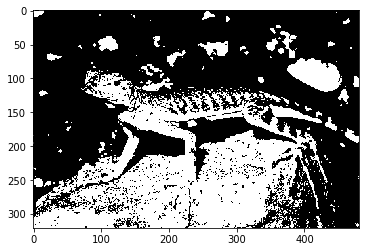

In [109]:
# looping every images
results = []
for i in range(50):
    print('For image:', i)
    rgb_img = list_img[i]
    img = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
    new_img = img.reshape(-1,1)
    N = new_img.shape[0]
    shape = np.shape(img)

    # error = 0.005
    # maximum iteration = 1000
    # cluster = 2

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(new_img.T, 2, 2, error=0.005, maxiter=1000, init=None,seed=42)
    # u = partition matrix
    new_image = np.zeros(shape = (N,1))
    for r in range(N):
        if u[0,r]  > u[1, r] :
            new_image[r] = 0
        else:
            new_image[r] = 1
            
    new_image = new_image.reshape(list_img[i].shape[0], list_img[i].shape[1])
    results.append(new_image)
    plt.imshow(new_image, cmap = 'gray')
    

In [78]:
def convert(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] == 0:
                img[i,j] = 1
            else:
                img[i,j] = 0
    return img            

In [107]:
results[20] = convert(results[20])

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


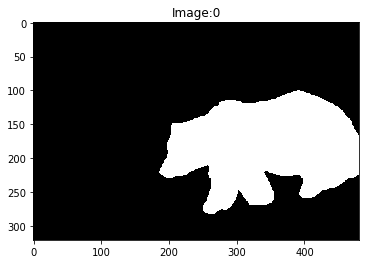

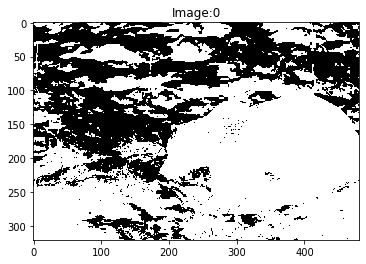

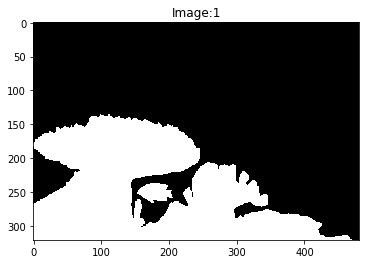

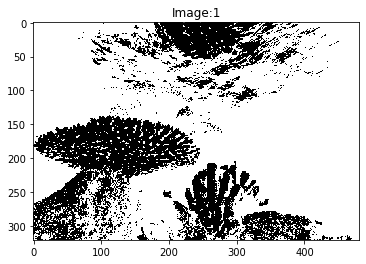

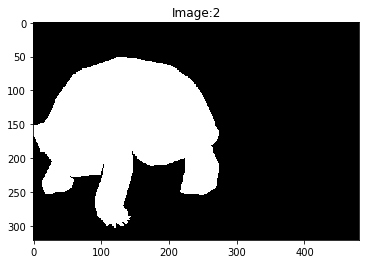

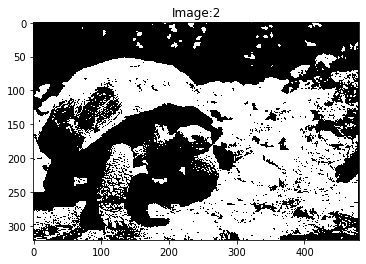

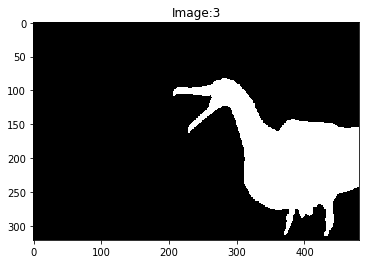

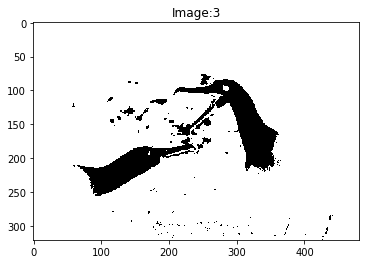

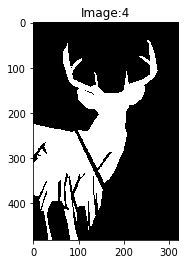

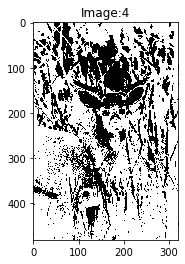

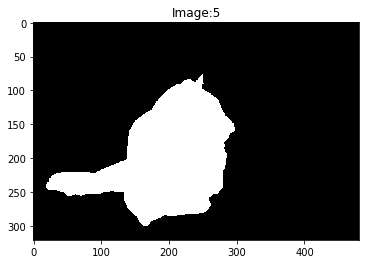

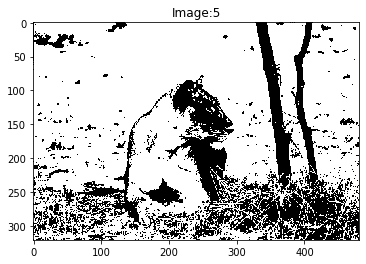

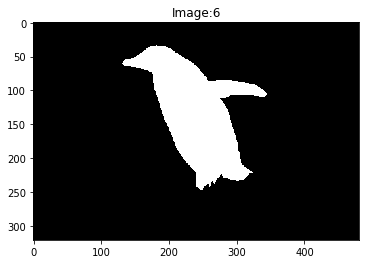

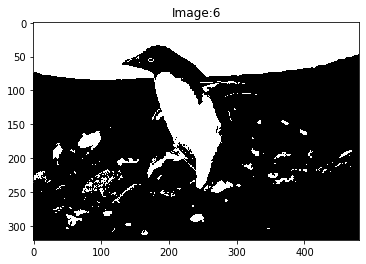

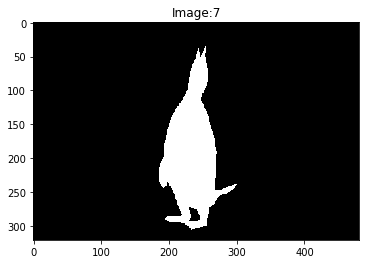

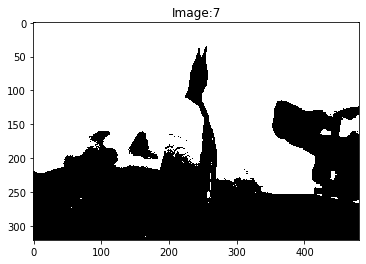

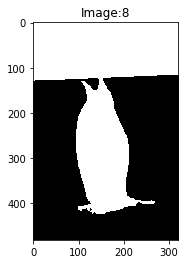

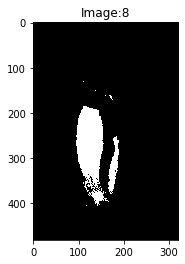

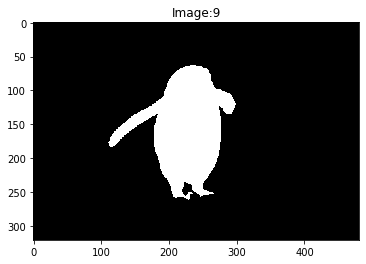

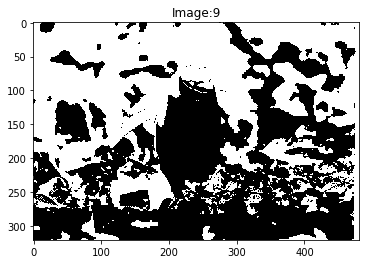

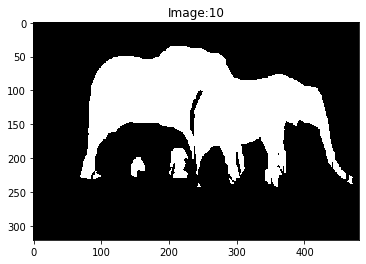

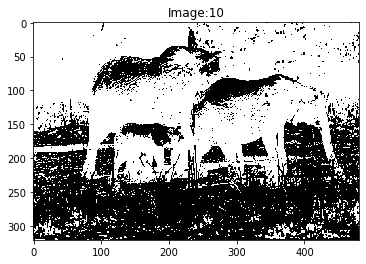

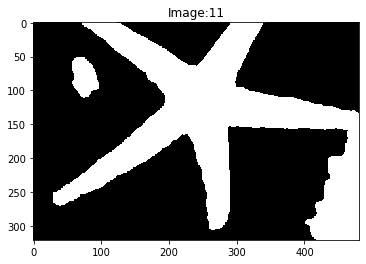

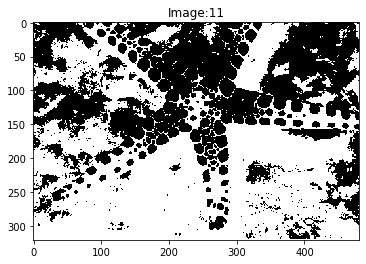

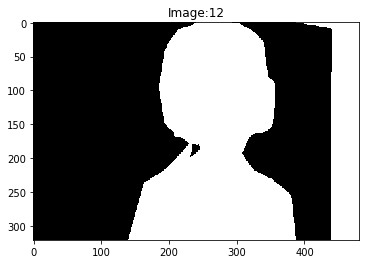

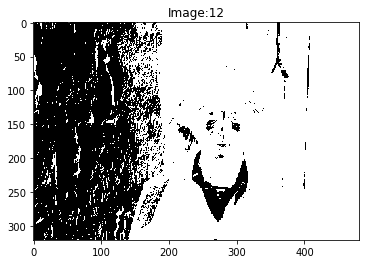

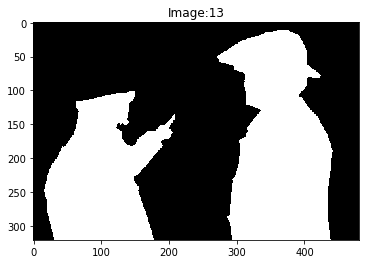

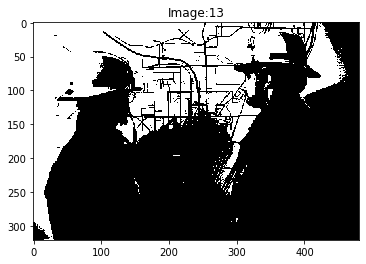

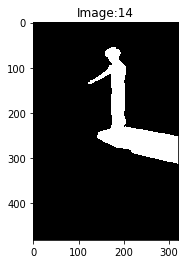

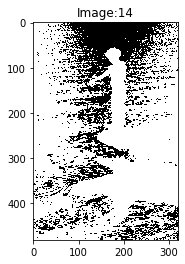

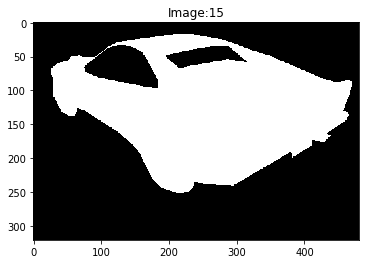

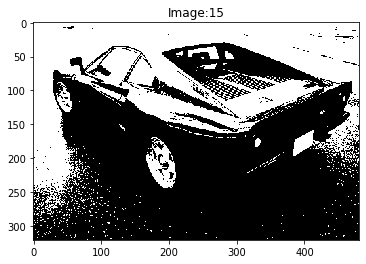

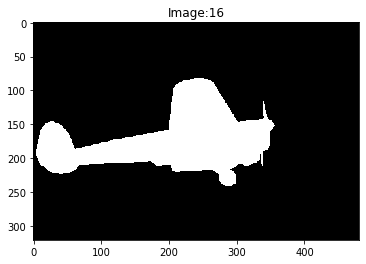

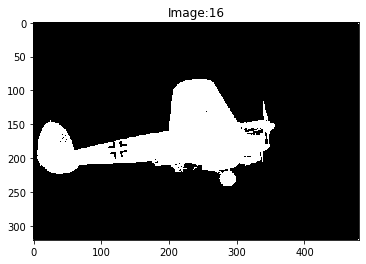

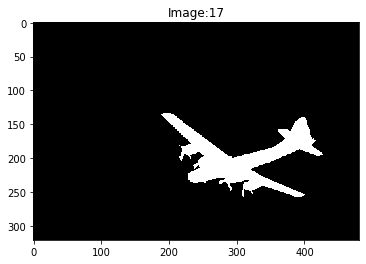

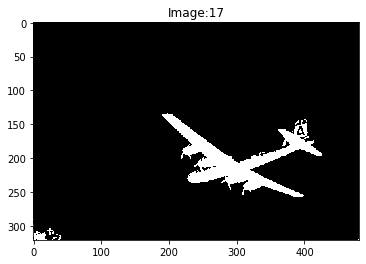

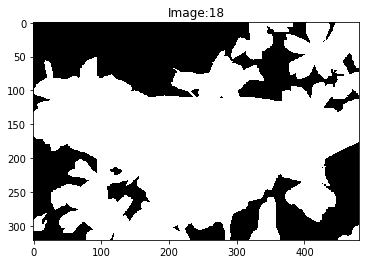

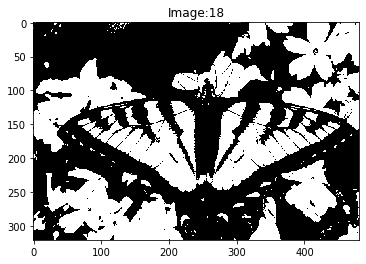

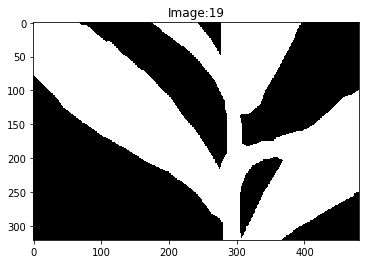

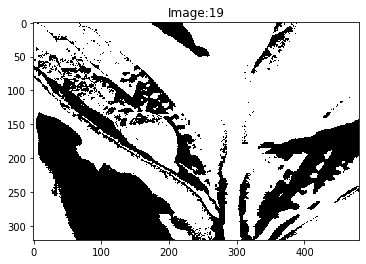

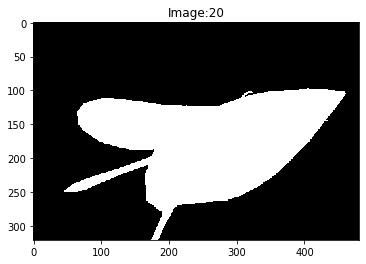

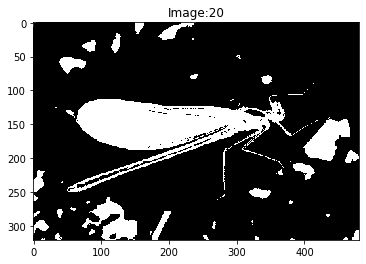

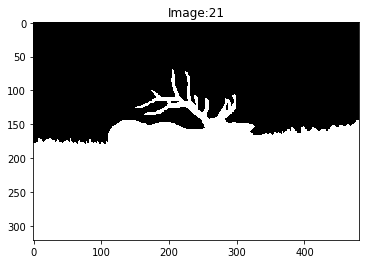

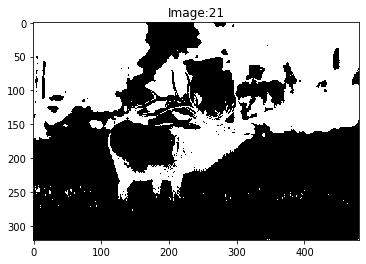

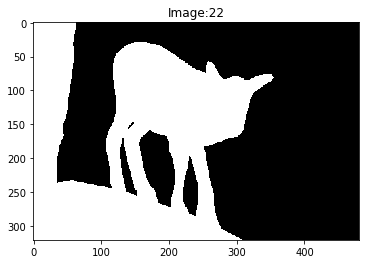

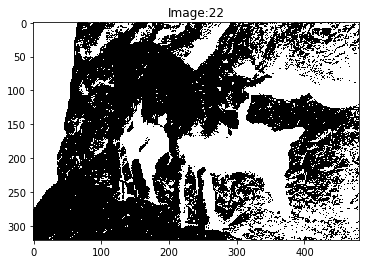

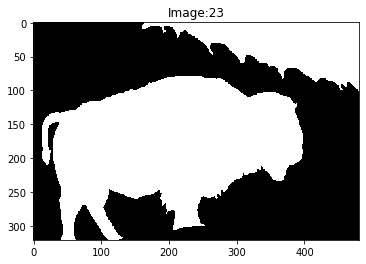

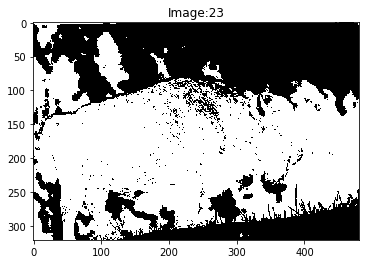

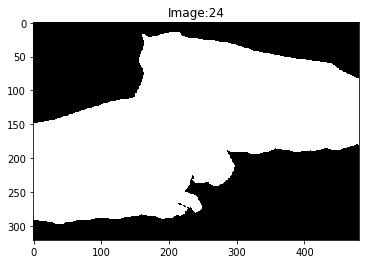

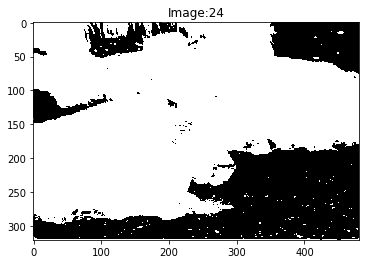

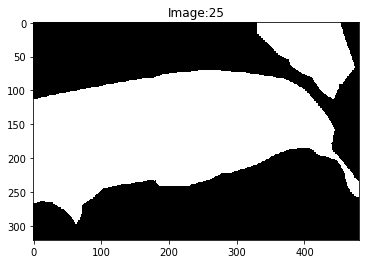

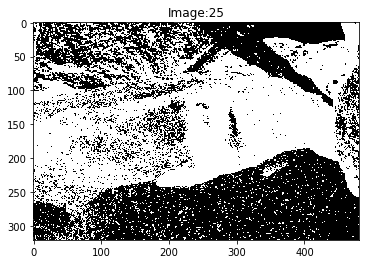

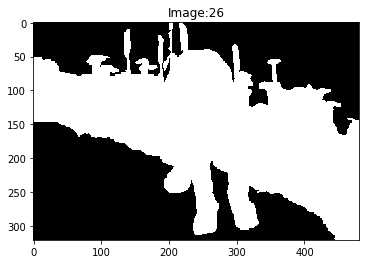

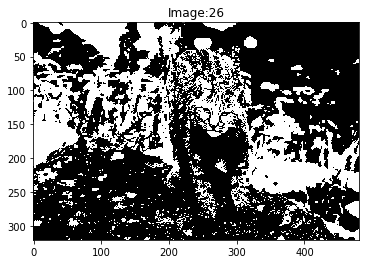

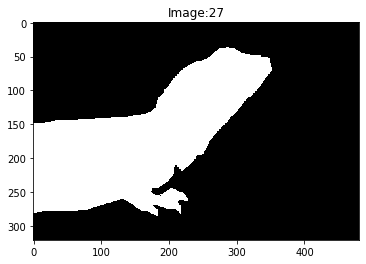

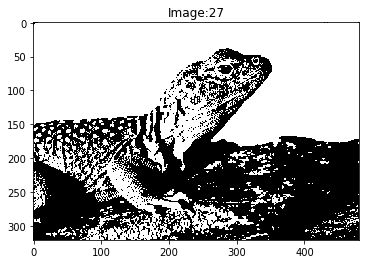

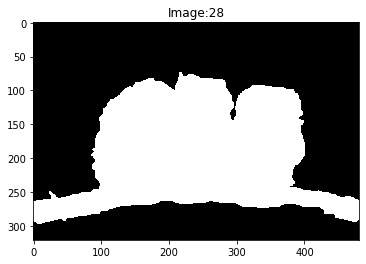

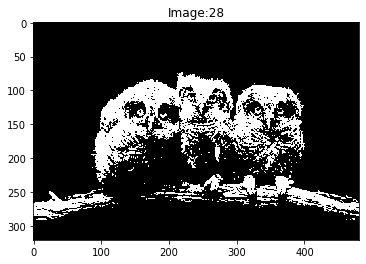

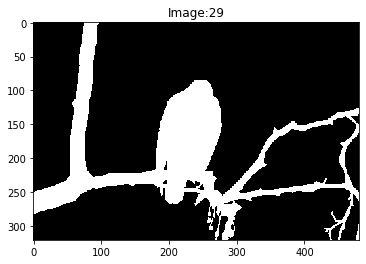

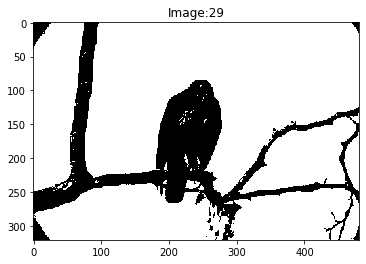

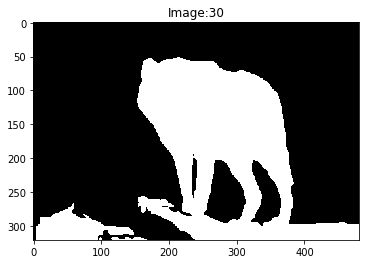

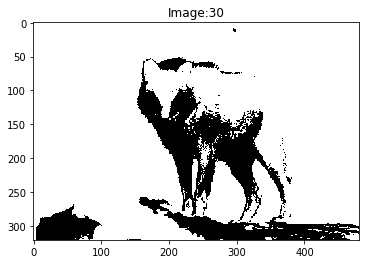

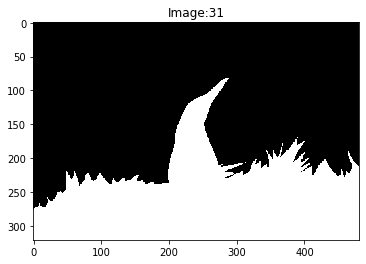

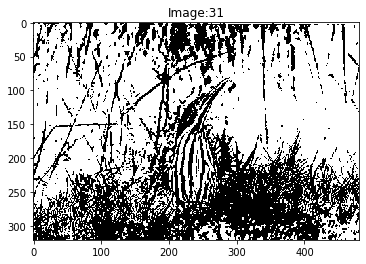

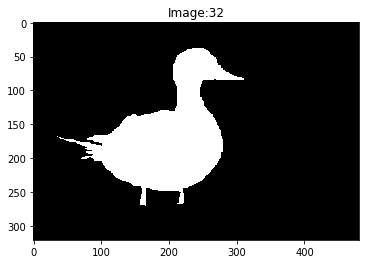

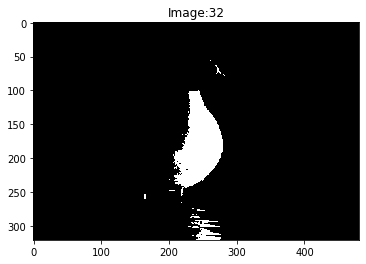

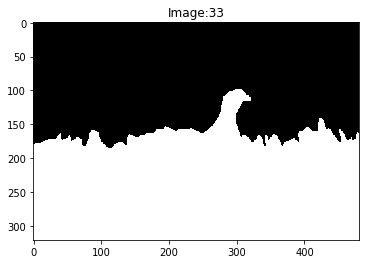

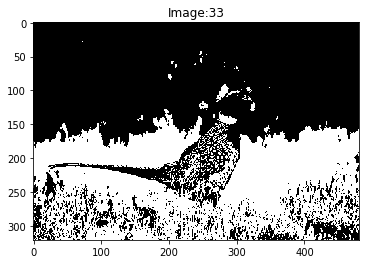

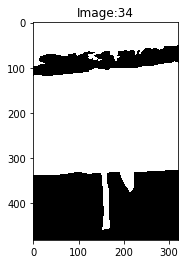

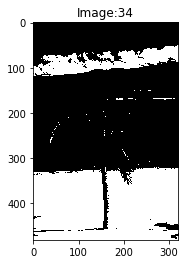

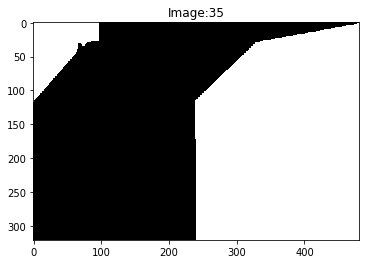

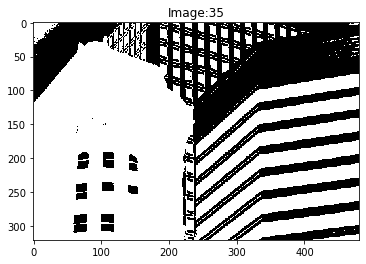

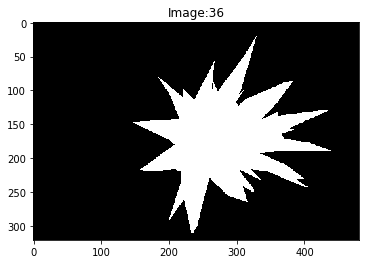

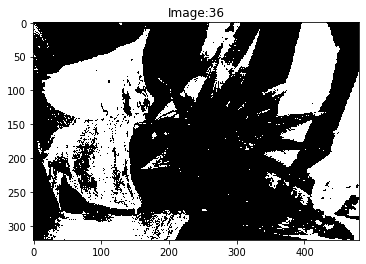

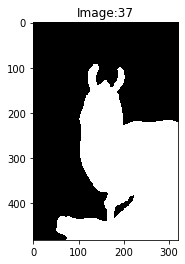

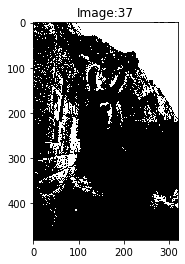

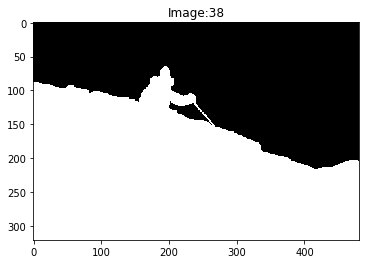

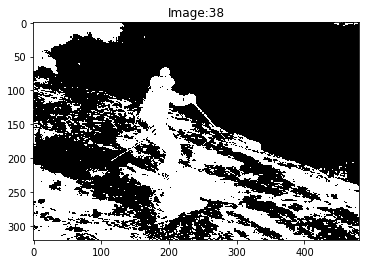

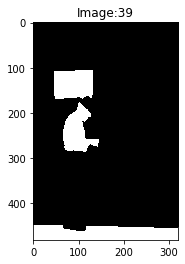

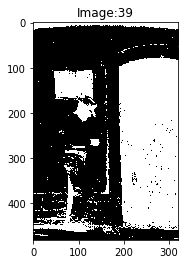

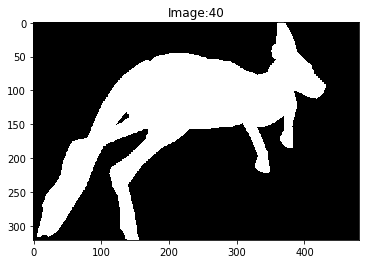

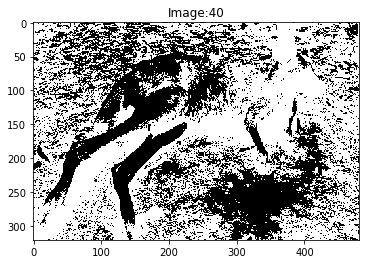

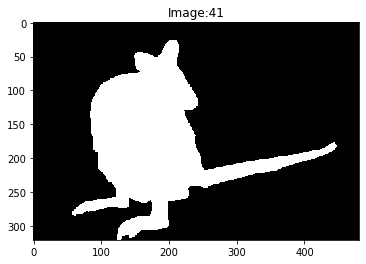

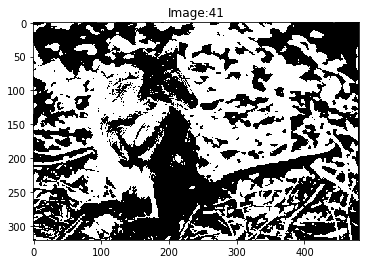

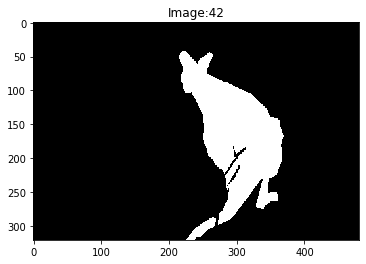

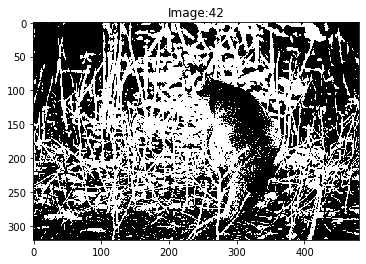

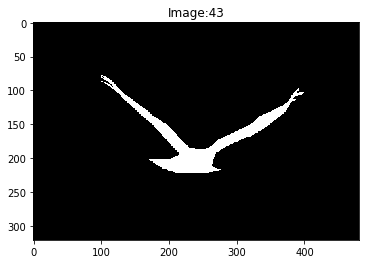

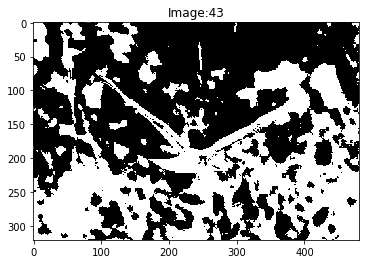

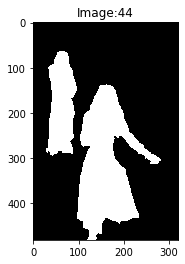

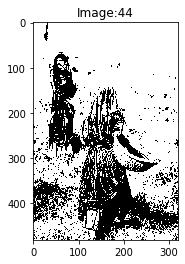

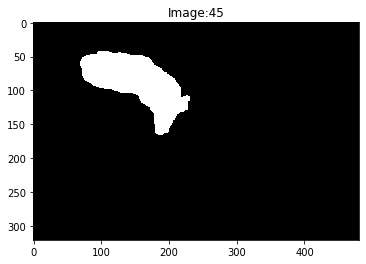

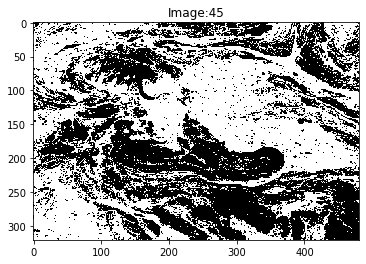

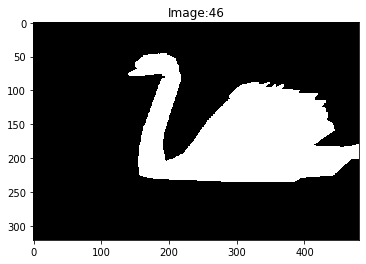

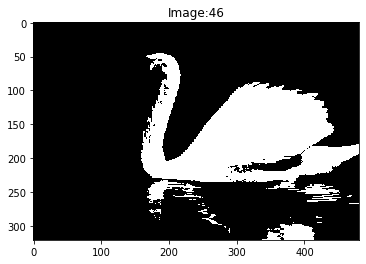

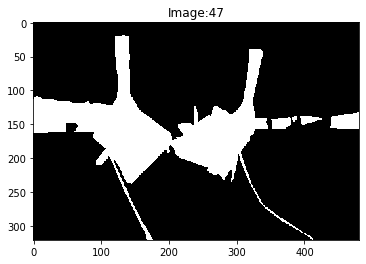

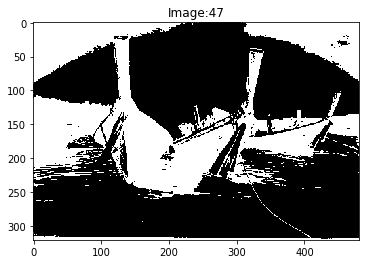

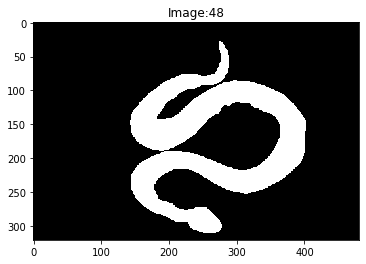

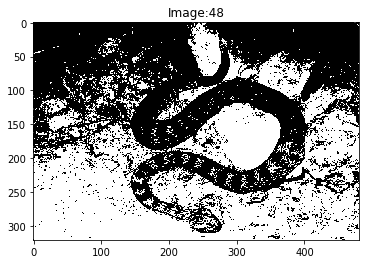

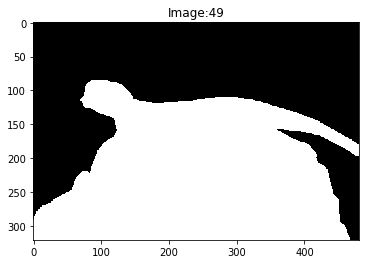

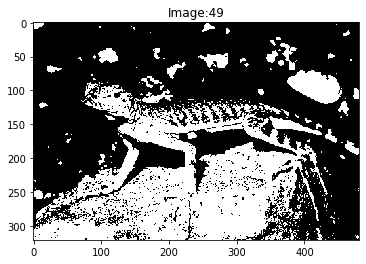

In [114]:
for i in range(50):
    plt.figure()
    plt.title('Image:' + str(i))
    plt.imshow(ground_truths[i], cmap = 'gray')
    plt.figure()
    plt.title('Image:' + str(i))
    plt.imshow(results[i], cmap = 'gray')
    

50

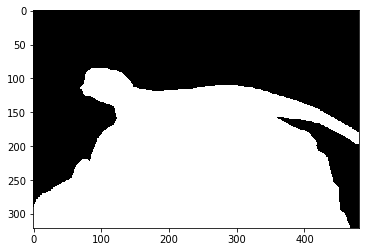

In [72]:
ground_truths = []
for img in images_ground_truth: 
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = convert_gray_2_binary_truth(img)
    ground_truths.append(img) 
len(ground_truths)

In [73]:
# Precision, Recall, F1 Score, IUC
# TP = 11 (ground_truth, result_data)
# FN = 00 (actual, predicted)
# FP = 01
# FN = 10
def calc_precision_recall(results, ground_truths):
    precisions = []
    recalls = []
    F1_scores = []
    IOUs = []
    accuracies =[]
     
    for k in range(len(results)):
        print('for image',k, '\n')
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for i in range(results[k].shape[0]):
            for j in range(results[k].shape[1]):
                if results[k][i,j] == 0 and ground_truths[k][i,j] == 0:
                    FN = FN + 1
                elif results[k][i,j] == 0 and ground_truths[k][i,j] == 1:
                    FP = FP + 1
                elif results[k][i,j] == 1 and ground_truths[k][i,j] == 0:
                    FN = FN + 1
                else :
                    TP = TP + 1
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        iou = TP /(TP + FN + FP )
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        if (precision + recall) != 0:
            f1_score = (2 * precision * recall)/ (precision + recall)
        else:
            f1_score = 0
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy*100)
        IOUs.append(iou)
        F1_scores.append(f1_score)
    return precisions, recalls, accuracies, IOUs, F1_scores

In [74]:
precisions, recalls, accuracies, IOUs, F1_scores = calc_precision_recall(results, ground_truths)

for image 0 

for image 1 

for image 2 

for image 3 

for image 4 

for image 5 

for image 6 

for image 7 

for image 8 

for image 9 

for image 10 

for image 11 

for image 12 

for image 13 

for image 14 

for image 15 

for image 16 

for image 17 

for image 18 

for image 19 

for image 20 

for image 21 

for image 22 

for image 23 

for image 24 

for image 25 

for image 26 

for image 27 

for image 28 

for image 29 

for image 30 

for image 31 

for image 32 

for image 33 

for image 34 

for image 35 

for image 36 

for image 37 

for image 38 

for image 39 

for image 40 

for image 41 

for image 42 

for image 43 

for image 44 

for image 45 

for image 46 

for image 47 

for image 48 

for image 49 



In [75]:
df = pd.DataFrame(ID_data, columns = ['Image_ID'])
df.insert(1, "Precision", precisions, True) 
df.insert(2, "Recall", recalls, True)
df.insert(3, "F1_score", F1_scores, True) 
df.insert(4, "Accuracy", accuracies, True)
df.insert(5, "IOU", IOUs, True) 
df.head()

,Image_ID,Precision,Recall,F1_score,Accuracy,IOU
0,100098.jpg,0.014145,0.004043,0.006288,0.315412,0.003154
1,101027.jpg,0.638737,0.219826,0.327083,19.551687,0.195517
2,103006.jpg,0.572607,0.176479,0.269804,15.593811,0.155938
3,103029.jpg,0.261146,0.047657,0.080604,4.199455,0.041995
4,104010.jpg,0.397056,0.127160,0.192629,10.657962,0.106580


In [68]:
df.to_csv('FCM.csv', index=False)